In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('./data/agricultural_production_indices.csv',encoding='latin-1', skiprows=1)
data.rename(columns={"Unnamed: 1":"description"}, inplace=True)


### Perform cursory examination

In [3]:
# Understanding the shape of data
data.shape

(3760, 7)

In [4]:
# getting the columns of data
columns=list(data.columns)
print(columns, len(columns))

['Region/Country/Area', 'description', 'Year', 'Series', 'Value', 'Footnotes', 'Source'] 7


In [5]:
# List first five rows of the data
data.head()

,Region/Country/Area,description,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1975,Agricultural production (Index Base: 2004-2006...,51.3,NaN,Food and Agriculture Organization of the Unite...
1,1,"Total, all countries or areas",1985,Agricultural production (Index Base: 2004-2006...,65.5,NaN,Food and Agriculture Organization of the Unite...
2,1,"Total, all countries or areas",1995,Agricultural production (Index Base: 2004-2006...,78.3,NaN,Food and Agriculture Organization of the Unite...
3,1,"Total, all countries or areas",2005,Agricultural production (Index Base: 2004-2006...,99.9,NaN,Food and Agriculture Organization of the Unite...
4,1,"Total, all countries or areas",2010,Agricultural production (Index Base: 2004-2006...,112.9,NaN,Food and Agriculture Organization of the Unite...


In [6]:
# Display last five last rows
data.tail()

,Region/Country/Area,description,Year,Series,Value,Footnotes,Source
3755,97,European Union (EU),2005,Food production (Index Base: 2004-2006 = 100),99.0,NaN,Food and Agriculture Organization of the Unite...
3756,97,European Union (EU),2010,Food production (Index Base: 2004-2006 = 100),99.9,NaN,Food and Agriculture Organization of the Unite...
3757,97,European Union (EU),2014,Food production (Index Base: 2004-2006 = 100),103.6,NaN,Food and Agriculture Organization of the Unite...
3758,97,European Union (EU),2015,Food production (Index Base: 2004-2006 = 100),103.4,NaN,Food and Agriculture Organization of the Unite...
3759,97,European Union (EU),2016,Food production (Index Base: 2004-2006 = 100),102.0,NaN,Food and Agriculture Organization of the Unite...


In [7]:
# Let me look  at the sample of 15 records
data.sample(15)

,Region/Country/Area,description,Year,Series,Value,Footnotes,Source
3735,716,Zimbabwe,2016,Agricultural production (Index Base: 2004-2006...,100.4,NaN,Food and Agriculture Organization of the Unite...
2671,512,Oman,2014,Food production (Index Base: 2004-2006 = 100),130.9,NaN,Food and Agriculture Organization of the Unite...
966,136,Cayman Islands,1975,Agricultural production (Index Base: 2004-2006...,229.8,NaN,Food and Agriculture Organization of the Unite...
3208,144,Sri Lanka,1995,Food production (Index Base: 2004-2006 = 100),97.2,NaN,Food and Agriculture Organization of the Unite...
1252,180,Dem. Rep. of the Congo,2015,Agricultural production (Index Base: 2004-2006...,109.6,NaN,Food and Agriculture Organization of the Unite...
747,64,Bhutan,1985,Agricultural production (Index Base: 2004-2006...,45.0,NaN,Food and Agriculture Organization of the Unite...
2729,600,Paraguay,2016,Agricultural production (Index Base: 2004-2006...,163.9,NaN,Food and Agriculture Organization of the Unite...
527,28,Antigua and Barbuda,2005,Agricultural production (Index Base: 2004-2006...,95.1,NaN,Food and Agriculture Organization of the Unite...
3657,704,Viet Nam,1985,Food production (Index Base: 2004-2006 = 100),38.7,NaN,Food and Agriculture Organization of the Unite...
3606,860,Uzbekistan,2010,Agricultural production (Index Base: 2004-2006...,127.4,NaN,Food and Agriculture Organization of the Unite...


In [8]:
# Here we start to think that the source column has a single value for all rows. From the analysis that we have tried to check on

# The proof is
print(list(data['Source'].unique()))

print("\n\n")


# From the cursory analysis, we thought that Footnotes is null for all records, but we confirmed with :
print(list(data['Footnotes'].unique()))


# The answer is that there is some values somewhere

['Food and Agriculture Organization of the United Nations (FAO), Rome, FAOSTAT database, last accessed May 2018.']



[nan, 'For statistical purposes, the data for China do not include those for the Hong Kong Special Administrative Region (Hong Kong SAR), Macao Special Administrative Region (Macao SAR) and Taiwan Province of China.']


In [9]:
checkNaN=data.isna()
NaNStatus=checkNaN['Footnotes']
data['NaNStatus']=NaNStatus
data[data['NaNStatus'] == False]

,Region/Country/Area,description,Year,Series,Value,Footnotes,Source,NaNStatus
1030,156,China,1975,Agricultural production (Index Base: 2004-2006...,25.5,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1031,156,China,1985,Agricultural production (Index Base: 2004-2006...,40.4,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1032,156,China,1995,Agricultural production (Index Base: 2004-2006...,67.4,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1033,156,China,2005,Agricultural production (Index Base: 2004-2006...,100.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1034,156,China,2010,Agricultural production (Index Base: 2004-2006...,119.9,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1035,156,China,2014,Agricultural production (Index Base: 2004-2006...,132.9,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1036,156,China,2015,Agricultural production (Index Base: 2004-2006...,136.5,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1037,156,China,2016,Agricultural production (Index Base: 2004-2006...,139.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1038,156,China,1975,Food production (Index Base: 2004-2006 = 100),25.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False
1039,156,China,1985,Food production (Index Base: 2004-2006 = 100),39.2,"For statistical purposes, the data for China d...",Food and Agriculture Organization of the Unite...,False


In [10]:
# from the above work, only 16 records (1030-1045) are not NaN for their footnotes.

# Here is the summary of our data's information.
print("DATA INFORMATION Using df.info() \n")
print(data.info())

print("\n \n \n \nDATA DESCRIPTION Using df.describe() function \n")
print(data.describe())


DATA INFORMATION Using df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  3760 non-null   int64  
 1   description          3760 non-null   object 
 2   Year                 3760 non-null   int64  
 3   Series               3760 non-null   object 
 4   Value                3760 non-null   float64
 5   Footnotes            16 non-null     object 
 6   Source               3760 non-null   object 
 7   NaNStatus            3760 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 209.4+ KB
None

 
 
 
DATA DESCRIPTION Using df.describe() function 

       Region/Country/Area         Year        Value
count          3760.000000  3760.000000  3760.000000
mean            383.629787  2002.563830   101.135399
std             266.669445    14.012238    41.989354
min           

###### Extract data for Africa, as we are interested in Africa

In [11]:
"""
Let me extract data for africa
"""
data.rename(columns={"description": "region"},inplace=True)
africa_regions=[i for i in list(data['region'].unique()) if "Africa" in i]
print(f"African Regions: {africa_regions}")

africa_regions.remove('Africa')
africa_regions

African Regions: ['Africa', 'Northern Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa', 'Central African Republic', 'South Africa']


['Northern Africa',
 'Eastern Africa',
 'Middle Africa',
 'Southern Africa',
 'Western Africa',
 'Central African Republic',
 'South Africa']

In [12]:
data['Series'].unique()

array(['Agricultural production (Index Base: 2004-2006 = 100)',
       'Food production (Index Base: 2004-2006 = 100)'], dtype=object)

In [13]:
# example of a normalization
from sklearn.preprocessing import LabelEncoder
# define data
encoder=LabelEncoder()
data['Series']=encoder.fit_transform(data['Series'])

# Agriculture = 0
# Food production = 1
data

,Region/Country/Area,region,Year,Series,Value,Footnotes,Source,NaNStatus
0,1,"Total, all countries or areas",1975,0,51.3,NaN,Food and Agriculture Organization of the Unite...,True
1,1,"Total, all countries or areas",1985,0,65.5,NaN,Food and Agriculture Organization of the Unite...,True
2,1,"Total, all countries or areas",1995,0,78.3,NaN,Food and Agriculture Organization of the Unite...,True
3,1,"Total, all countries or areas",2005,0,99.9,NaN,Food and Agriculture Organization of the Unite...,True
4,1,"Total, all countries or areas",2010,0,112.9,NaN,Food and Agriculture Organization of the Unite...,True
...,...,...,...,...,...,...,...,...
3755,97,European Union (EU),2005,1,99.0,NaN,Food and Agriculture Organization of the Unite...,True
3756,97,European Union (EU),2010,1,99.9,NaN,Food and Agriculture Organization of the Unite...,True
3757,97,European Union (EU),2014,1,103.6,NaN,Food and Agriculture Organization of the Unite...,True
3758,97,European Union (EU),2015,1,103.4,NaN,Food and Agriculture Organization of the Unite...,True


## Genaral visulization about the data

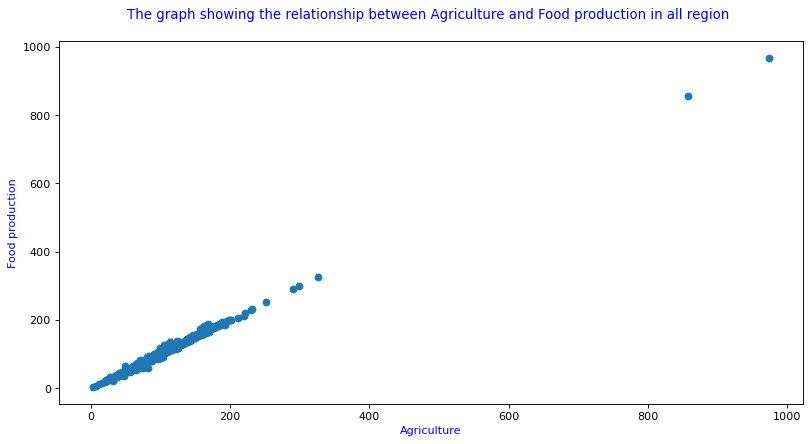

In [14]:
# Extracting values of Agriculture
# Extracting values of Food production

# Visualize 

agriculture_data=data[data['Series']==0]
food_data=data[data['Series']==1]


plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(agriculture_data['Value'],food_data['Value'], cmap='rainbow')
plt.title('The graph showing the relationship between Agriculture and Food production in all region \n', color='b')
plt.xlabel('Agriculture', color='b')
plt.ylabel('Food production', color='b')
plt.show()

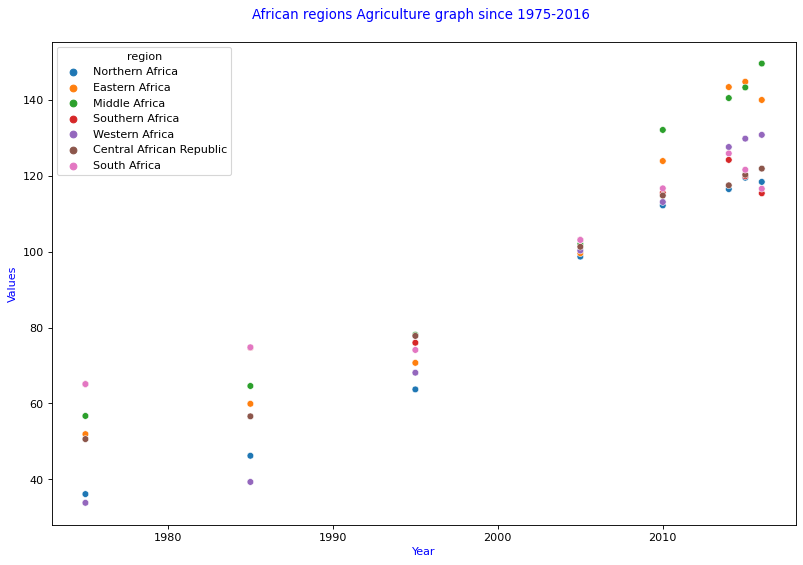

In [15]:
plt.figure(figsize=(12, 8), dpi=80)
africa_data = data[data['region'].isin(africa_regions)]

# Get agricultural data
africa_agri=africa_data[africa_data['Series']==0]

sns.scatterplot(x='Year', y='Value', data=africa_agri, hue='region')
plt.xlabel('Year', color='b')
plt.ylabel('Values', color='b')
plt.title('African regions Agriculture graph since 1975-2016 \n', color='b')

plt.show()

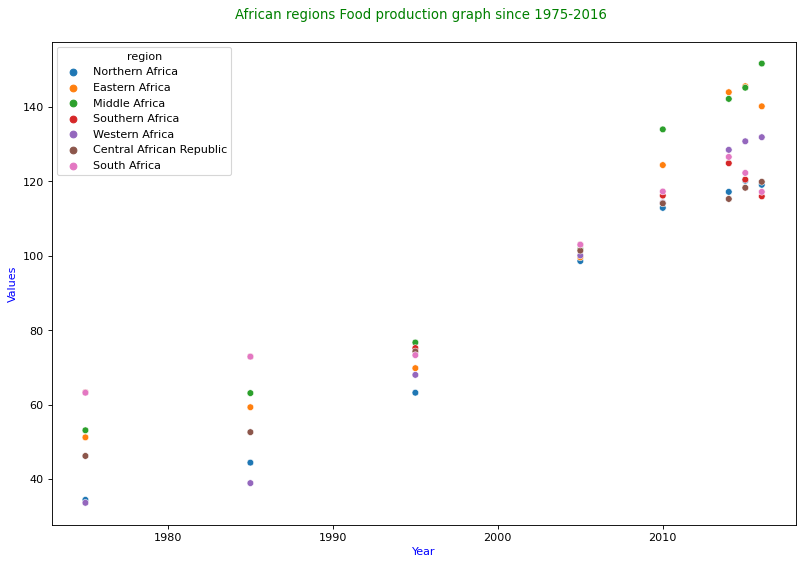

In [16]:
plt.figure(figsize=(12, 8), dpi=80)
africa_data = data[data['region'].isin(africa_regions)]

# Get agricultural data
africa_agri=africa_data[africa_data['Series']==1]

sns.scatterplot(x='Year', y='Value', data=africa_agri, hue='region')
plt.xlabel('Year', color='b')
plt.ylabel('Values', color='b')
plt.title('African regions Food production graph since 1975-2016 \n', color='g')

plt.show()

## Visualization for our questions
- Question One: how has been the agriculture and food production in east africa compare to western africa?

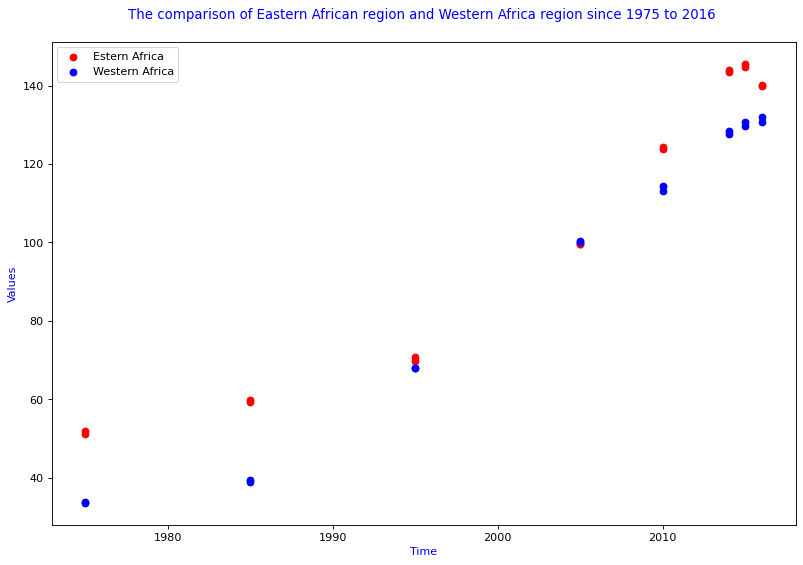

In [20]:
# Extracting the data for East Africa and West Africa
east_african_data=data[data['region']==africa_regions[1]]
west_african_data=data[data['region']==africa_regions[-3]]

east_time=east_african_data['Year']
west_time=west_african_data['Year']

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(east_time, east_african_data['Value'], color='r', label='Estern Africa')
plt.scatter(west_time, west_african_data['Value'], color='b', label='Western Africa')
plt.xlabel('Time', color='b')
plt.ylabel('Values', color='b')
plt.legend()
plt.title('The comparison of Eastern African region and Western Africa region since 1975 to 2016 \n', color='b')
plt.show()

#### How does Rwanda compare to Easten african region in  terms of agricultural production? whenever the agricultural production in eastern africa increase, does also rwandan one increase.

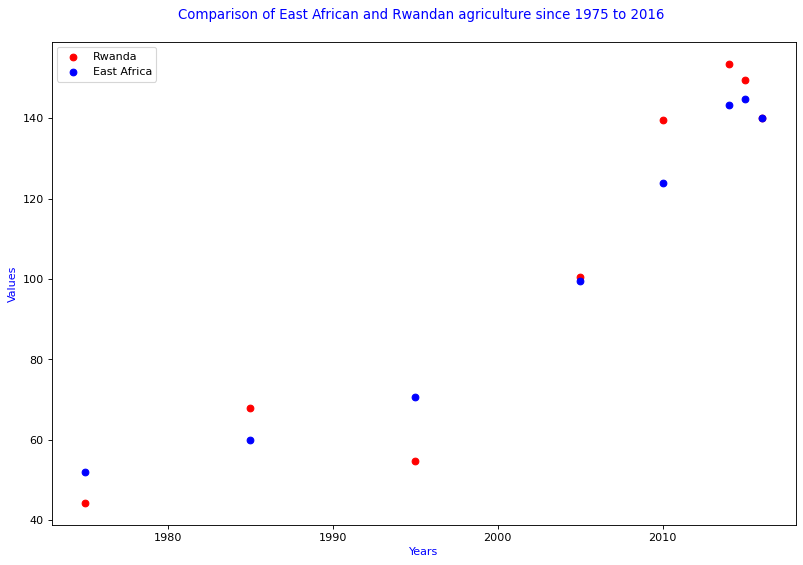

In [228]:
rwandan_data=data[data['region']=='Rwanda']
rwandan_data=rwandan_data[rwandan_data['Series']==0]
rwanda_time=rwandan_data['Year']

east_african_data=east_african_data[east_african_data['Series']==0]
east_time=east_african_data['Year']
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(rwanda_time, rwandan_data['Value'], color='r', label='Rwanda')
plt.scatter(east_time, east_african_data['Value'], color='b', label='East Africa')
plt.xlabel('Years', color='b')
plt.ylabel('Values', color='b')
plt.title('Comparison of East African and Rwandan agriculture since 1975 to 2016 \n', color='b')
plt.legend()
plt.show()

In [21]:
# Me and Malik thought about comparing Rwanda with the remaining countries of east African
# Formula

# (Avg * n) - rwanda_data

##### What is the relationship between food and Agricultural production in Rwanda?

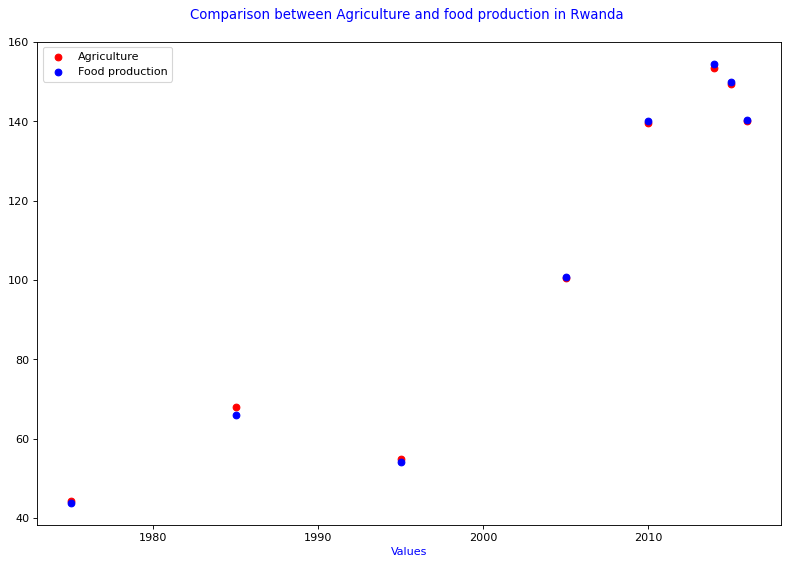

In [233]:
rwandan_data=data[data['region']=='Rwanda']
rwanda_agri_data=rwandan_data[rwandan_data['Series']==0]
rwanda_food_data=rwandan_data[rwandan_data['Series']==1]
x1=rwanda_agri_data['Year']
x2=rwanda_food_data['Year']
 # plot and see the relationship
    
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x1, rwanda_agri_data['Value'], color='r', label='Agriculture')
plt.scatter(x2, rwanda_food_data['Value'], color='b', label='Food production')
plt.legend()
plt.xlabel('Time', color='b')
plt.xlabel('Values', color='b')
plt.title('Comparison between Agriculture and food production in Rwanda \n', color='b')
plt.show()